In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth, Circle, Marker

In [65]:
df = pd.read_csv(r"E:\Dataa\final_term\Bakery Sales.csv")
df

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Xử lý dữ liệu khuyết

In [66]:
df.dropna(axis = 0, subset = df.columns[1:26], how = "all", inplace = True)

In [67]:
df.replace(np.nan, 0, inplace = True)

In [68]:
df["Index"] = [i for i in range(0, len(df.index))]
df.set_index("Index")
df.drop("Index", axis = 1, inplace = True)

In [69]:
df = df[0:2405]
df.tail()

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
2400,2020-04-30 12:17,Thur,18800.0,석사동,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2401,2020-04-30 13:10,Thur,14800.0,후평 3동,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2402,2020-04-30 13:43,Thur,16800.0,동면,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2403,2020-04-30 15:01,Thur,18800.0,동면,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2404,2020-04-30 16:02,Thur,15300.0,후평 3동,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df["date"] = pd.to_datetime(df["datetime"])
df.drop("datetime", axis = 1, inplace = True)
df.head()

C:\Users\Dell\AppData\Local\Temp/ipykernel_11552/2743537674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["datetime"])
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,...,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,date
0,Thur,23800.0,0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-07-11 15:35:00
1,Thur,15800.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2019-07-11 16:10:00
2,Fri,58000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-12 11:49:00
3,Sat,14800.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-07-13 13:19:00
4,Sat,15600.0,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-13 13:22:00


In [71]:
df['dates'] = df['date'].dt.strftime("%Y-%m")
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

C:\Users\Dell\AppData\Local\Temp/ipykernel_11552/1732645942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dates'] = df['date'].dt.strftime("%Y-%m")
C:\Users\Dell\AppData\Local\Temp/ipykernel_11552/1732645942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
C:\Users\Dell\AppData\Local\Temp/ipykernel_11552/1732645942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [72]:
df.sample()

,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,...,wiener,vanila latte,berry ade,tiramisu,merinque cookies,date,dates,month,day,hour
1650,Mon,16000.0,퇴계동,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2020-02-10 14:03:00,2020-02,2,10,14


In [73]:
df_month_sale = df.groupby(df['dates'], as_index = False)['total'].sum()
df_month_sale

,dates,total
0,2019-07,4076500.0
1,2019-08,6100500.0
2,2019-09,4895500.0
3,2019-10,3959100.0
4,2019-11,4543000.0
5,2019-12,5009500.0
6,2020-01,4582500.0
7,2020-02,6423700.0
8,2020-03,6445100.0
9,2020-04,4893700.0


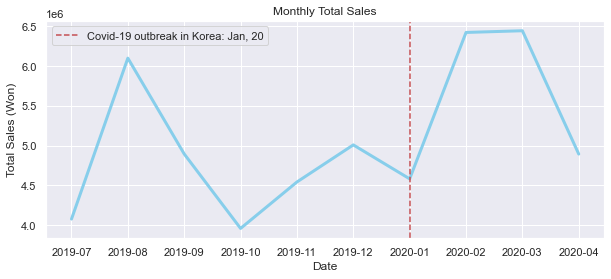

In [74]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (10,4))

sns.lineplot(data = df_month_sale, x = 'dates', y = 'total', color = 'skyblue', linewidth = 3)
plt.axvline(x = '2020-01', color = 'r', linestyle = '--', label = 'Covid-19 outbreak in Korea: Jan, 20')

plt.legend()
plt.title('Monthly Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales (Won)')
plt.show()

In [75]:
df_month_pain = df.groupby(df['day of week'], as_index = False)[['angbutter', 'plain bread', 'jam',
                                                           'croissant', 'tiramisu croissant',
                                                           'cacao deep', 'pain au chocolat', 'almond croissant', 'croque monsieur',
                                                           'mad garlic', 'gateau chocolat', 'pandoro',
                                                           'cheese cake', 'orange pound', 'wiener','tiramisu', 'merinque cookies']].sum()
df_month_pain

,day of week,angbutter,plain bread,jam,croissant,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,gateau chocolat,pandoro,cheese cake,orange pound,wiener,tiramisu,merinque cookies
0,Fri,441.0,137.0,36.0,165.0,121.0,43.0,86.0,38.0,0.0,0.0,25.0,59.0,16.0,99.0,65.0,0.0,3.0
1,Mon,419.0,123.0,30.0,165.0,156.0,51.0,119.0,33.0,0.0,0.0,23.0,59.0,10.0,75.0,61.0,1.0,6.0
2,Sat,562.0,184.0,52.0,197.0,185.0,72.0,132.0,34.0,0.0,0.0,45.0,83.0,17.0,86.0,90.0,4.0,10.0
3,Sun,707.0,254.0,49.0,210.0,180.0,96.0,148.0,50.0,0.0,0.0,42.0,81.0,24.0,135.0,115.0,2.0,10.0
4,Thur,569.0,162.0,47.0,157.0,164.0,46.0,115.0,34.0,0.0,0.0,39.0,56.0,9.0,89.0,82.0,0.0,10.0
5,Tues,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0
6,Wed,508.0,163.0,35.0,149.0,128.0,54.0,121.0,44.0,0.0,0.0,35.0,56.0,13.0,78.0,60.0,0.0,8.0


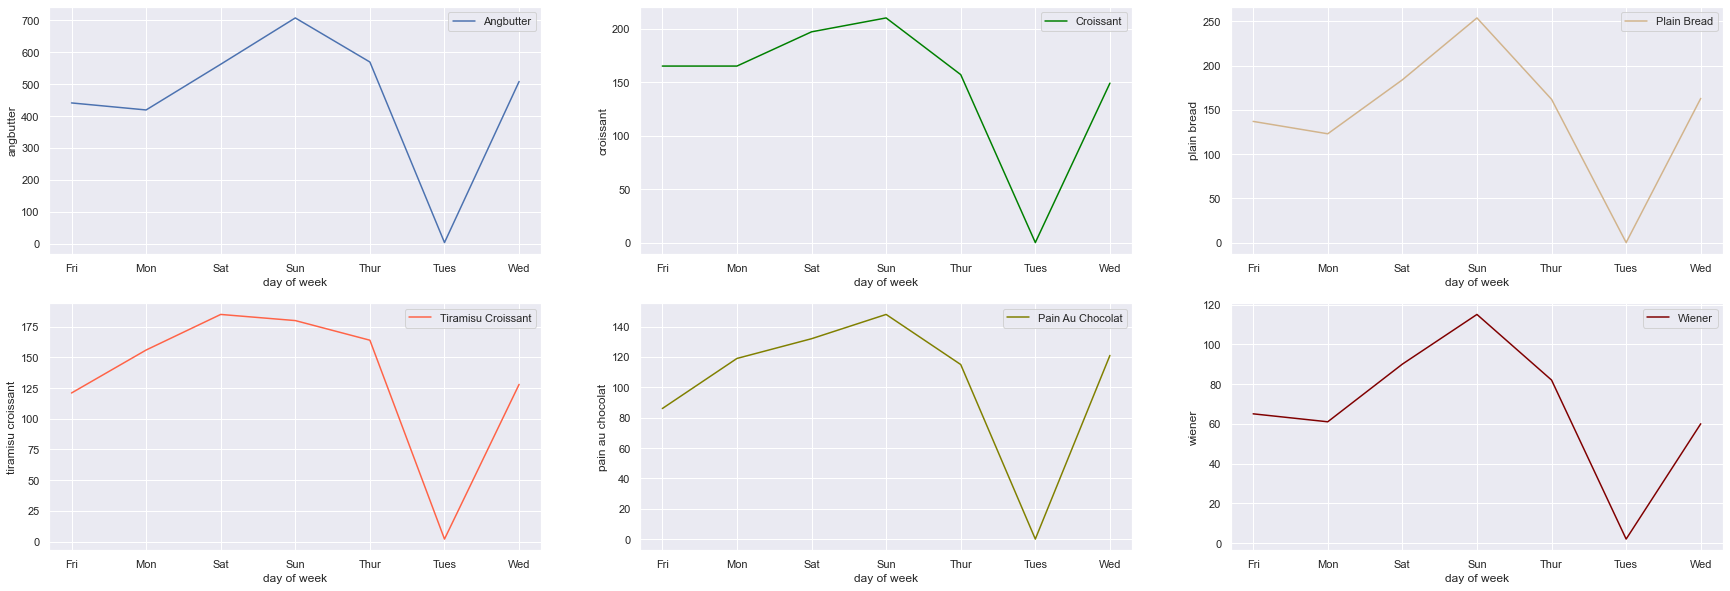

In [76]:
sns.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(30,10)
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'angbutter', label = 'Angbutter', ax = ax1)
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'croissant', label = 'Croissant', ax = ax2, color = 'green')
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'plain bread', label = 'Plain Bread', ax = ax3, color = 'Tan')
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'tiramisu croissant', label = 'Tiramisu Croissant', ax = ax4, color = 'Tomato')
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'pain au chocolat', label = 'Pain Au Chocolat', ax = ax5, color = 'Olive')
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'wiener', label = 'Wiener', ax = ax6, color = 'Maroon')
plt.show()

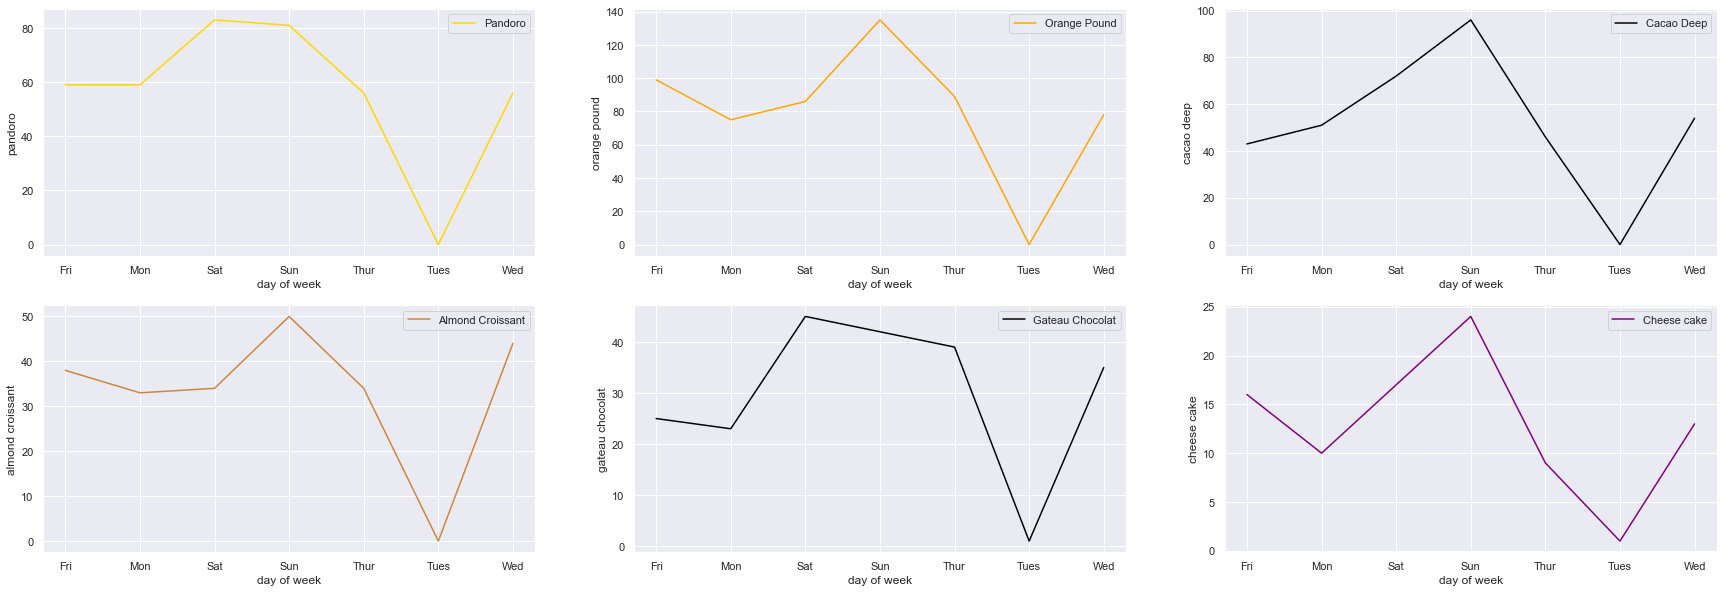

In [77]:
sns.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(30,10)
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'pandoro', label = 'Pandoro', ax = ax1, color = 'gold')
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'orange pound', label = 'Orange Pound', ax = ax2, color = 'orange')
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'cacao deep', label = 'Cacao Deep', ax = ax3, color = 'black')
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'almond croissant', label = 'Almond Croissant', ax = ax4, color = 'Peru')
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'gateau chocolat', label = 'Gateau Chocolat', ax = ax5, color = 'black')
sns.lineplot(data = df_month_pain, x = 'day of week', y = 'cheese cake', label = 'Cheese cake', ax = ax6, color = 'purple')

plt.show()

In [78]:
df_month_beverage = df.groupby(df['day of week'], as_index = False)[['americano', 'caffe latte', 'milk tea', 'vanila latte', 'berry ade', 'lemon ade']].sum()
df_month_beverage

,day of week,americano,caffe latte,milk tea,vanila latte,berry ade,lemon ade
0,Fri,55.0,21.0,21.0,34.0,9.0,8.0
1,Mon,51.0,35.0,25.0,33.0,8.0,4.0
2,Sat,93.0,41.0,19.0,34.0,9.0,11.0
3,Sun,162.0,49.0,42.0,64.0,13.0,4.0
4,Thur,74.0,37.0,20.0,41.0,10.0,3.0
5,Tues,1.0,0.0,0.0,0.0,0.0,0.0
6,Wed,72.0,29.0,33.0,34.0,5.0,8.0


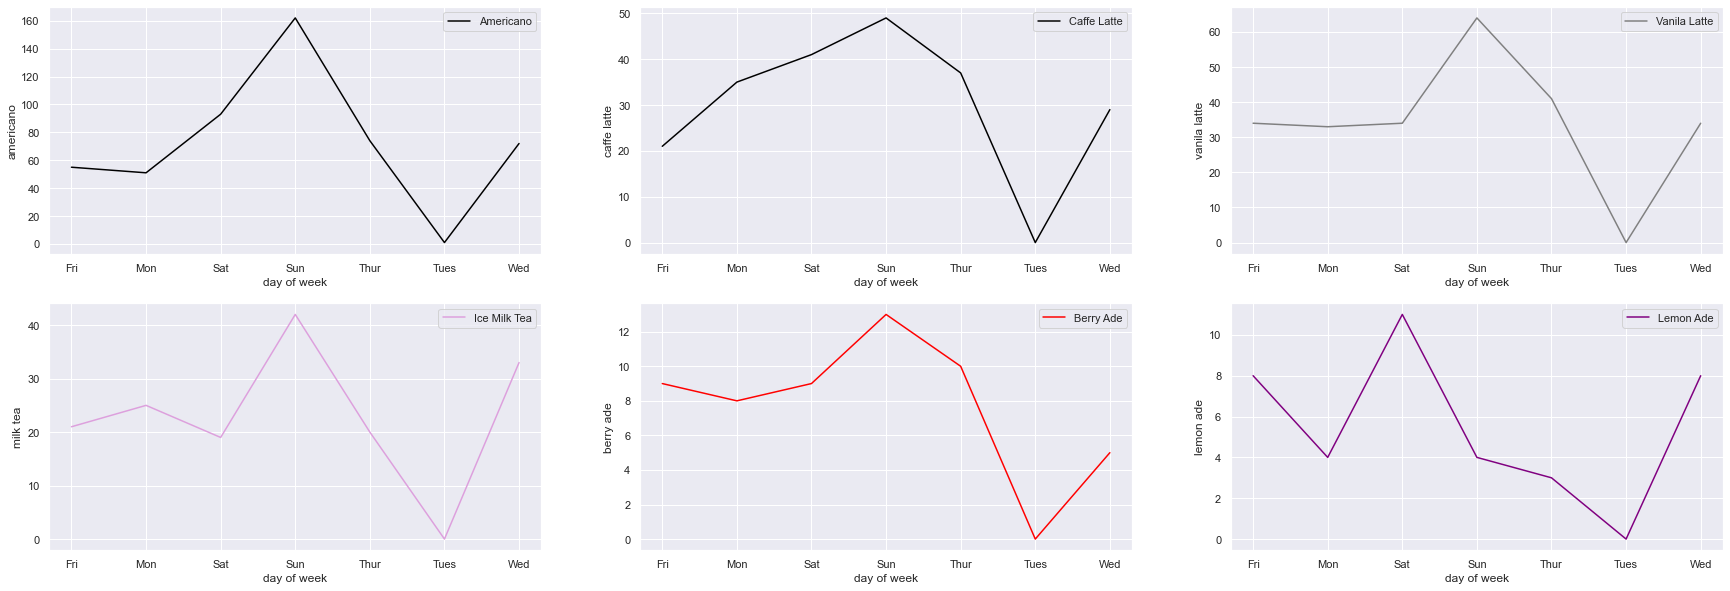

In [79]:
sns.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(30,10)
sns.lineplot(data = df_month_beverage, x = 'day of week', y = 'americano', label = 'Americano', ax = ax1, color = 'black')
sns.lineplot(data = df_month_beverage, x = 'day of week', y = 'caffe latte', label = 'Caffe Latte', ax = ax2, color = 'black')
sns.lineplot(data = df_month_beverage, x = 'day of week', y = 'vanila latte', label = 'Vanila Latte', ax = ax3, color = 'gray')
sns.lineplot(data = df_month_beverage, x = 'day of week', y = 'milk tea', label = 'Ice Milk Tea', ax = ax4, color = 'Plum')
sns.lineplot(data = df_month_beverage, x = 'day of week', y = 'berry ade', label = 'Berry Ade', ax = ax5, color = 'red')
sns.lineplot(data = df_month_beverage, x = 'day of week', y = 'lemon ade', label = 'Lemon Ade', ax = ax6, color = 'purple')

plt.legend()
plt.show()

In [88]:
df['time'] = ['lunch' if hour < 14 else 'afternoon' for hour in df['hour']]

C:\Users\Dell\AppData\Local\Temp/ipykernel_11552/2212759118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = ['lunch' if hour < 14 else 'afternoon' for hour in df['hour']]


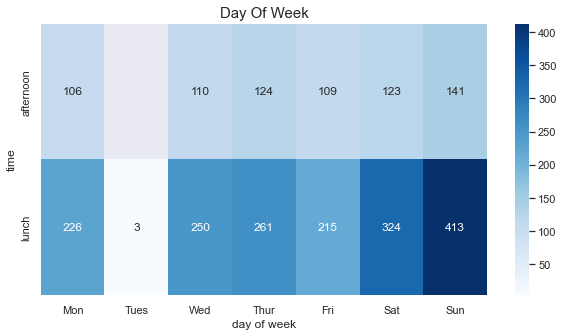

In [89]:
p = df.pivot_table(index = 'time', columns = 'day of week', values = 'day', aggfunc = 'count')
p = p.reindex(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], axis = 1)

plt.figure(figsize = (10,5))
g = sns.heatmap(p, annot = True, cmap = 'Blues', fmt=".0f")
plt.title("Day Of Week", size = 15)
plt.show()

In [ ]:
angbutter_pivot = df.pivot_table(index = 'time', columns = 'day of week', values = 'angbutter', aggfunc = 'sum')
angbutter_pivot = angbutter_pivot.reindex(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], axis = 1)

plt.figure(figsize = (10,5))
g = sns.heatmap(angbutter_pivot, annot = True, cmap = 'Greens', fmt= ".0f")
plt.title('Sales of Angbutter by day and time', size = 15)
plt.show()

In [80]:
a = []
for i in range(3,26):
    a.append(df["%s"%df.columns[i]].sum())

In [81]:
product_data = {
    "product": [df.columns[i] for i in range(3,26)],
    "sum": a
}

In [82]:
product = pd.DataFrame(product_data)

In [83]:
product

,product,sum
0,angbutter,3210.0
1,plain bread,1023.0
2,jam,249.0
3,americano,508.0
4,croissant,1043.0
5,caffe latte,212.0
6,tiramisu croissant,936.0
7,cacao deep,362.0
8,pain au chocolat,721.0
9,almond croissant,233.0


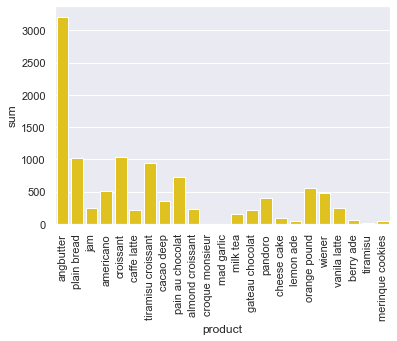

In [84]:
ax = sns.barplot(data = product, x = 'product', y = 'sum', color = 'gold')
plt.xticks(rotation = 90)
plt.show()

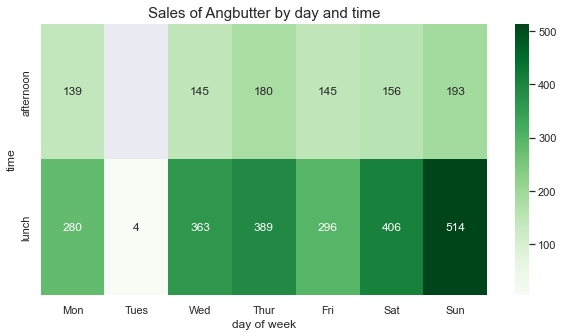

In [90]:
angbutter_pivot = df.pivot_table(index = 'time', columns = 'day of week', values = 'angbutter', aggfunc = 'sum')
angbutter_pivot = angbutter_pivot.reindex(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], axis = 1)

plt.figure(figsize = (10,5))
g = sns.heatmap(angbutter_pivot, annot = True, cmap = 'Greens', fmt= ".0f")
plt.title('Sales of Angbutter by day and time', size = 15)
plt.show()

In [85]:
hour_sale_list = []
for i in range(3,26):
    hour_sale_list.append(df.groupby(df['hour'])[df.columns[i]].sum())

    
hour_num = pd.DataFrame(hour_sale_list)
hour_num

hour,11,12,13,14,15,16,17,22,23
angbutter,979.0,686.0,587.0,452.0,312.0,157.0,29.0,1.0,7.0
plain bread,300.0,285.0,180.0,134.0,68.0,48.0,8.0,0.0,0.0
jam,63.0,55.0,46.0,44.0,24.0,14.0,3.0,0.0,0.0
americano,140.0,102.0,102.0,86.0,43.0,33.0,2.0,0.0,0.0
croissant,345.0,233.0,195.0,143.0,68.0,53.0,6.0,0.0,0.0
caffe latte,49.0,52.0,44.0,42.0,16.0,8.0,1.0,0.0,0.0
tiramisu croissant,333.0,195.0,192.0,105.0,74.0,28.0,8.0,1.0,0.0
cacao deep,102.0,94.0,54.0,58.0,26.0,23.0,5.0,0.0,0.0
pain au chocolat,255.0,168.0,127.0,98.0,48.0,20.0,5.0,0.0,0.0
almond croissant,88.0,46.0,35.0,20.0,25.0,18.0,1.0,0.0,0.0


In [86]:
hh = []
for i in range(0,9):
    hh.append(hour_num[hour_num.columns[i]].sum())
df_hour_num = pd.DataFrame({
    "hour" : [hour_num.columns[i] for i in range(0,9)],
    "sum_of_sale_product" :  hh
})
df_hour_num

,hour,sum_of_sale_product
0,11,3334.0
1,12,2409.0
2,13,1957.0
3,14,1510.0
4,15,921.0
5,16,532.0
6,17,102.0
7,22,3.0
8,23,7.0


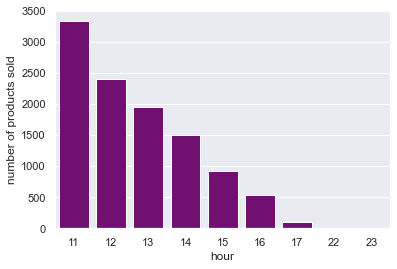

In [87]:
sns.barplot(data = df_hour_num, x = 'hour', y = 'sum_of_sale_product', label = 'Cheese cake', color = 'purple')
plt.ylabel("number of products sold")
plt.show()

Association Analysis

In [93]:
from mlxtend.frequent_patterns import apriori, association_rules

In [94]:
df_item = df.reset_index(inplace = True)
df_item = df.drop(['date','place', 'day of week', 'total', 'dates', 'month', 'day', 'hour','time', 'index'], axis = 1, index = None)
df_item = df_item >= 1
df_item.head()

,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
df_apriori = apriori(df_item, min_support = 0.01, use_colnames = True)
df_apriori.sort_values(by = 'support', ascending = False)

,support,itemsets
0,0.815800,(angbutter)
1,0.354262,(plain bread)
6,0.320582,(tiramisu croissant)
4,0.308108,(croissant)
20,0.267775,"(angbutter, plain bread)"
...,...,...
108,0.010395,"(almond croissant, vanila latte)"
202,0.010395,"(pain au chocolat, pandoro, tiramisu croissant)"
94,0.010395,"(cacao deep, almond croissant)"
82,0.010395,"(caffe latte, orange pound)"


In [100]:
df_apriori['length'] = df_apriori['itemsets'].apply(lambda x : len(x))

In [101]:
df_apriori2 = df_apriori[(df_apriori['length'] == 2) & df_apriori['support'] >= 0.05]
df_apriori2.sort_values(by = 'support', ascending = False).head()

,support,itemsets,length
20,0.267775,"(angbutter, plain bread)",2
25,0.247817,"(angbutter, tiramisu croissant)",2
23,0.229938,"(angbutter, croissant)",2
27,0.181289,"(pain au chocolat, angbutter)",2
34,0.167152,"(angbutter, orange pound)",2


In [102]:
rules = association_rules(df_apriori, metric = 'lift', min_threshold = 1)
rules.sort_values(by = 'lift', ascending = False, inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
77,"(americano, plain bread)",(jam),0.046985,0.091476,0.012058,0.256637,2.805511,0.007760,1.222181
78,(jam),"(americano, plain bread)",0.091476,0.046985,0.012058,0.131818,2.805511,0.007760,1.097713
91,"(pain au chocolat, plain bread)",(jam),0.086071,0.091476,0.021622,0.251208,2.746157,0.013748,1.213319
94,(jam),"(pain au chocolat, plain bread)",0.091476,0.086071,0.021622,0.236364,2.746157,0.013748,1.196812
102,(jam),"(wiener, plain bread)",0.091476,0.047401,0.011642,0.127273,2.685008,0.007306,1.091519
